# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# Loading dataset

In [3]:
data = pd.read_csv('C:\\Users\\USER\\Desktop\\btof\\transfusion.csv')
data.head(4)

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Recency (months)                            748 non-null    int64
 1   Frequency (times)                           748 non-null    int64
 2   Monetary (c.c. blood)                       748 non-null    int64
 3   Time (months)                               748 non-null    int64
 4   whether he/she donated blood in March 2007  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [7]:
data.describe()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


In [8]:
data.isnull().sum()

Recency (months)                              0
Frequency (times)                             0
Monetary (c.c. blood)                         0
Time (months)                                 0
whether he/she donated blood in March 2007    0
dtype: int64

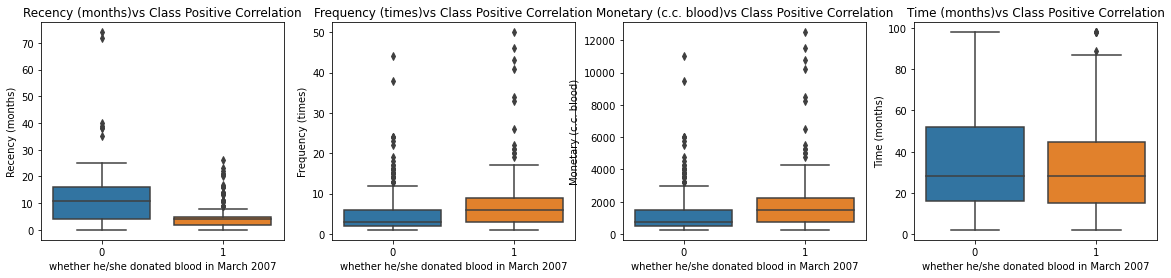

In [9]:
pos= ['Recency (months)', 'Frequency (times)', 'Monetary (c.c. blood)', 'Time (months)']

f, axes = plt.subplots(ncols=len(pos), figsize=(20,4))
for i,j in enumerate(pos):
# Postive Correlations with our Class (The higher our feature value the more likely it will be a fraud transaction)
    sns.boxplot(x="whether he/she donated blood in March 2007", y=j, data=data, ax=axes[i])
    axes[i].set_title(j+'vs Class Positive Correlation')

<AxesSubplot:>

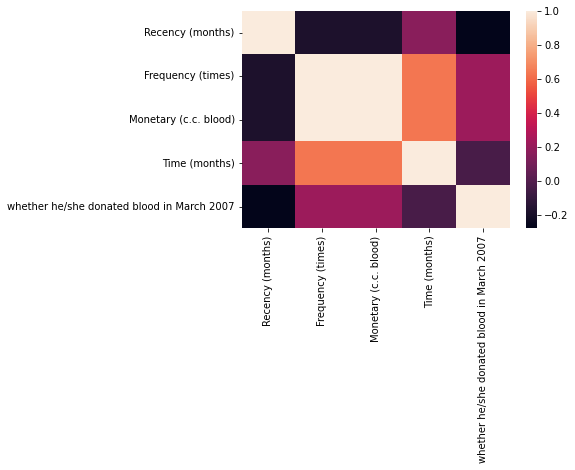

In [10]:
sns.heatmap(data.corr())

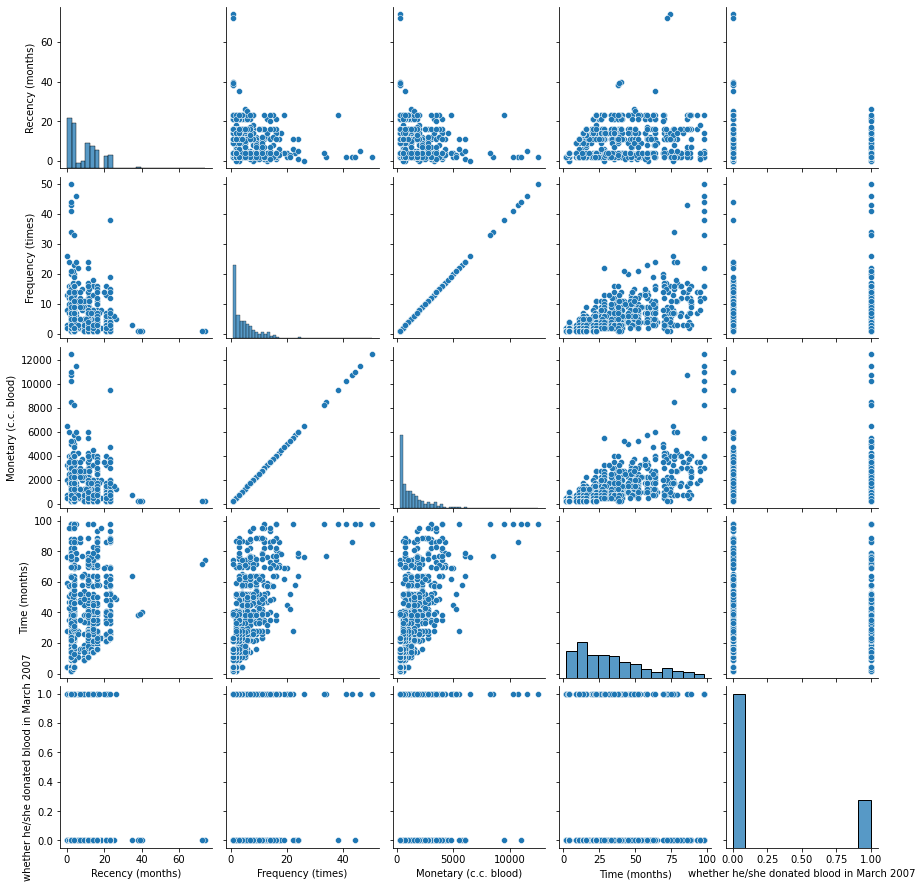

In [11]:
sns.pairplot(data)

In [12]:
X = data.iloc[:,:-1]
Y = data.iloc[:, -1]

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3, random_state = 123)

In [17]:
##Feature scaling 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [18]:
# Initial logistic regression

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

clf = LogisticRegression(C=0.001)
model_base = clf.fit(X_train, y_train)
y_pred = model_base.predict(X_test)
model_base.score(X_test, y_test)

print("Model accuracy is", model_base.score(X_test, y_test))

Model accuracy is 0.7333333333333333


In [19]:
metrics.confusion_matrix(y_test, y_pred)
# print(metrics.classification_report(y_test, y_pred))

array([[165,   0],
       [ 60,   0]], dtype=int64)

In [20]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, except for max_depth which is 5 so that we can plot and read the tree.
model_t = DecisionTreeClassifier(max_depth=5)
model_t.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [21]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred = model_t.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.93      0.83       165
           1       0.48      0.17      0.25        60

    accuracy                           0.73       225
   macro avg       0.62      0.55      0.54       225
weighted avg       0.68      0.73      0.68       225



In [22]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 40)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'max_depth': range(1, 40)}, return_train_score=True,
             scoring='accuracy')

In [23]:
# tree with max_depth = 3
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=3, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)
clf_gini.fit(X_train, y_train)

# score
print(clf_gini.score(X_test,y_test))

0.7333333333333333


In [24]:
# Fitting all models
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
#Fitting the models and calculating test and training score
classifier= {
    'Logistic Regression':LogisticRegression(),
    'KNN':KNeighborsClassifier(),
    'SVC':SVC(),
    'DecisionTree':DecisionTreeClassifier()
}

import warnings
warnings.filterwarnings('ignore')
for key,values in classifier.items():
    values.fit(X_train,y_train)
    training_score= cross_val_score(values,X_train,y_train,cv=5)
    print('Training accuracy score of {} is {}'.format(key,round(training_score.mean()*100,2)))
    train_pred = cross_val_predict(values, X_train,y_train, cv=5)
    print('Roc_Auc training score for {} is {}: '.format(key, round(roc_auc_score(y_train,train_pred)*100,2)))
    test_score= cross_val_score(values,X_test,y_test,cv=5)
    print('Test accuracy score of {} is {}'.format(key,round(test_score.mean()*100,2)))
    test_pred = cross_val_predict(values, X_test, y_test, cv=5)
    print('Roc_Auc test score for {} is {}: '.format(key, round(roc_auc_score(y_test,test_pred)*100,2)))
    print('---'*30)

Training accuracy score of Logistic Regression is 78.97
Roc_Auc training score for Logistic Regression is 56.39: 
Test accuracy score of Logistic Regression is 74.22
Roc_Auc test score for Logistic Regression is 54.32: 
------------------------------------------------------------------------------------------
Training accuracy score of KNN is 76.86
Roc_Auc training score for KNN is 61.34: 
Test accuracy score of KNN is 70.22
Roc_Auc test score for KNN is 56.36: 
------------------------------------------------------------------------------------------
Training accuracy score of SVC is 78.78
Roc_Auc training score for SVC is 57.17: 
Test accuracy score of SVC is 73.78
Roc_Auc test score for SVC is 51.36: 
------------------------------------------------------------------------------------------
Training accuracy score of DecisionTree is 74.38
Roc_Auc training score for DecisionTree is 59.06: 
Test accuracy score of DecisionTree is 61.78
Roc_Auc test score for DecisionTree is 47.88: 
---